In [1]:
import numpy as np
import powerlaw as pl
import scipy as sp
import heapq as hq
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import pylab as pylab
import pickle
import os
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib.colors as colors
from scipy import stats

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#n_comps = number of different balls
#d = dimension -- have not generalized to higher d
#N = number of points
n_comps = 3
d = 3
N = 1000
X = np.zeros([n_comps*N,d])
for i in range(n_comps):
    r = stats.uniform.rvs(size=N) + 2*i
    phi = 2*np.pi*stats.uniform.rvs(size=N)
    theta = np.pi*stats.uniform.rvs(size=N)
    X[N*i:N*(i+1),0] = np.multiply(r,np.multiply(np.cos(phi),np.sin(theta)))
    X[N*i:N*(i+1),1] = np.multiply(r,np.multiply(np.sin(phi),np.sin(theta)))
    X[N*i:N*(i+1),2] = np.multiply(r,np.cos(theta))

In [3]:
#Calculate sliced schematic
X_sliced = np.zeros([n_comps*N,2])
for i in range(n_comps):
    r = stats.uniform.rvs(size=N) + 2*i
    phi = 2*np.pi*stats.uniform.rvs(size=N)
    X_sliced[N*i:N*(i+1),0] = np.multiply(r,np.cos(phi))
    X_sliced[N*i:N*(i+1),1] = np.multiply(r,np.sin(phi))

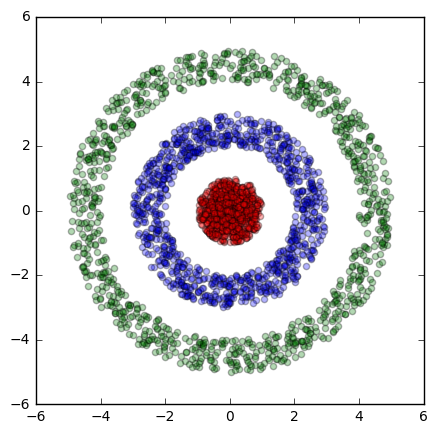

In [4]:
plt.figure(figsize=(5,5))
cols = ['r','b','g']
for i in range(n_comps):
    plt.scatter(X_sliced[N*i:N*(i+1),0],X_sliced[N*i:N*(i+1),1],c=cols[i],
                alpha=0.3,edgecolors=None)
plt.show()

In [5]:
#spectral embedding
se = manifold.SpectralEmbedding(n_components=2,n_neighbors=20)
X_embedded = se.fit_transform(X)

//anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


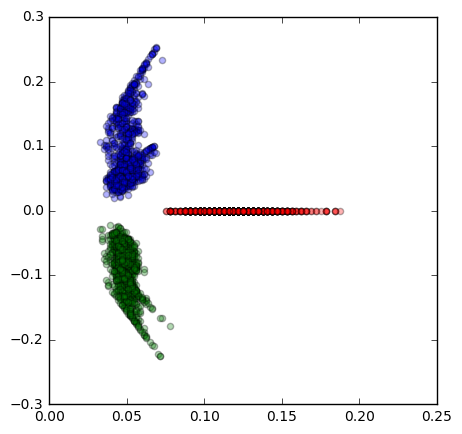

In [6]:
plt.figure(figsize=(5,5))
cols = ['r','b','g']
for i in range(n_comps):
    plt.scatter(X_embedded[N*i:N*(i+1),0],X_embedded[N*i:N*(i+1),1],c=cols[i],
                alpha=0.3,edgecolors=None)
plt.show()
pylab.savefig('figures/python_figs/spherical_LE_embedding.png')

In [7]:
#TSNE embedding, need to use barnes-hut because of large # of points
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,method='barnes_hut', angle=0.5,
                    learning_rate=300.0, perplexity=30.0)
print(tsne.get_params())
X_tsne = tsne.fit_transform(X)

{'n_iter': 1000, 'n_iter_without_progress': 30, 'angle': 0.5, 'verbose': 0, 'learning_rate': 300.0, 'method': 'barnes_hut', 'perplexity': 30.0, 'init': 'pca', 'random_state': 0, 'min_grad_norm': 1e-07, 'early_exaggeration': 4.0, 'metric': 'euclidean', 'n_components': 2}


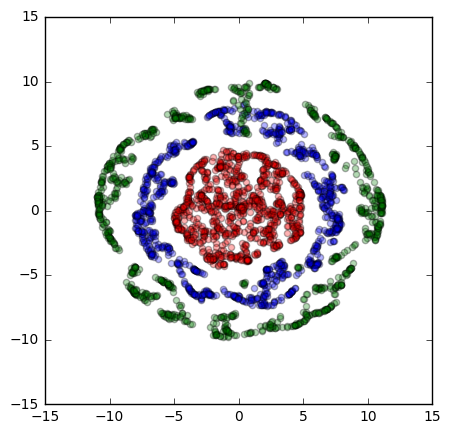

In [8]:
plt.figure(figsize=(5,5))
cols = ['r','b','g']
for i in range(n_comps):
    plt.scatter(X_tsne[N*i:N*(i+1),0],X_tsne[N*i:N*(i+1),1],c=cols[i],
                alpha=0.3,edgecolors=None)
plt.show()
pylab.savefig('figures/python_figs/spherical_TSNE_embedding.png')